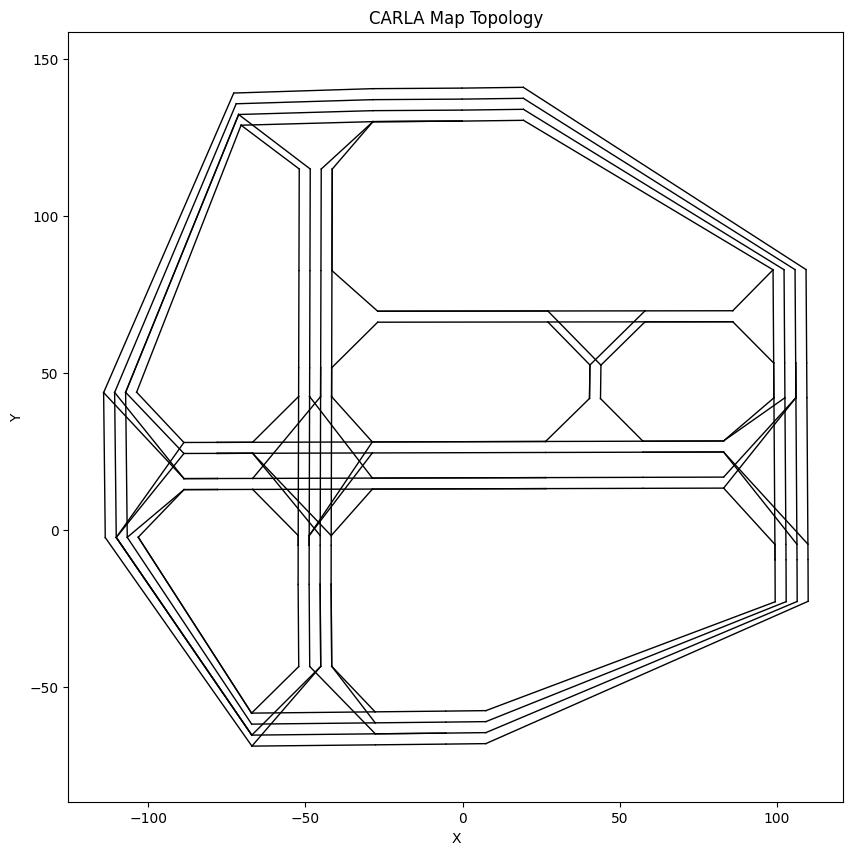

In [2]:
import carla
import matplotlib.pyplot as plt

# Connect to CARLA
client = carla.Client('localhost', 2000)
client.set_timeout(10.0)
world = client.get_world()

# Get the map
carla_map = world.get_map()

# Get the road topology
topology = carla_map.get_topology()

# Extract road segments
road_segments = []
for start_waypoint, end_waypoint in topology:
    road_segments.append((
        (start_waypoint.transform.location.x, start_waypoint.transform.location.y),
        (end_waypoint.transform.location.x, end_waypoint.transform.location.y)
    ))

# Plot the road network
plt.figure(figsize=(10, 10))
for road in road_segments:
    x_coords, y_coords = zip(*road)
    plt.plot(x_coords, y_coords, color='black', linewidth=1)

plt.title("CARLA Map Topology")
plt.xlabel("X")
plt.ylabel("Y")
plt.axis('equal')
plt.savefig("carla_map_topology.png")
plt.show()
